<h1 style = "color:green" align = "right">Machine RUL Predictor </h1>

<img src="images/hydraulic_cylender.png" alt="Drawing"/>

# Concept study

The goal of this project is to **predict the Remaining Useful Life (RUL)** of components of a machine  by analyzing **IoT** and **operations data**. This can be useful for predictive maintenance tasks.

<h3>Machine RUL Dataset</h3>

<p>This <a href="https://www.kaggle.com/datasets/sasakitetsuya/machine-rul-data">dataset</a> was created to simulate data related to the predictive maintenance of critical components in construction machinery, such as cranes, excavators, and bulldozers. It contains 1,000 records, each representing a unique component.

</p>


<h3>Features Description:</h3>
<ul>
    <li><strong>Component_ID</strong>: A unique identifier for each component, formatted as CMP0001 to CMP1000 [Text]</li>
    <li><strong>Component_Type</strong>: The type of component [Engine, Hydraulic Cylinder, Gear]</li>
    <li><strong>Vibration</strong>: The vibration level of the component, measured between 0.1 and 5.0
        [Numeric: arbitrary units ]</li>
    <li><strong>Temperature</strong>: The operating temperature of the component, ranging from 40 to 100
        [Numeric: degrees Celsius]</li>
    <li><strong>Pressure</strong>: The pressure exerted on the component, ranging from 50 to 300. [Numeric: psi]</li>
    <li><strong>Operating_Hours</strong>: The total time the component has been in operation, ranging from 0 to 5,000.
        [Numeric: hours]</li>
    <li><strong>Remaining_Useful_Life (RUL)</strong>: The estimated time left before the component fails, randomly assigned within a range of 50 to 1,000.
        [Numeric: hours]</li>
</ul>

<h3>Usage:</h3>
<p>This dataset aims to support the development and testing of machine learning models for Remaining Useful Life (RUL) prediction. It mimics real-world scenarios where sensor data is collected and analyzed to optimize maintenance schedules, reduce downtime, and improve operational efficiency. The features are designed to allow exploratory data analysis and advanced feature engineering for predictive maintenance tasks.</p>

Data sourced from: <a href="https://www.kaggle.com/datasets/sasakitetsuya/machine-rul-data">Machine RUL Data</a>.


**Reminder:**

In this project, we will use information about components of machines to predict their remaining useful life. 

### **Disclaimer** 🛑  
The dataset used in this project is **synthetic** and has been generated rather than collected from real-world sources. ⚠️ Due to the lack of transparency in the data synthesis process, the exact methods and criteria used are **unknown** 🤷‍♂️. As a result, the patterns and relationships within the data may not accurately reflect real-world phenomena 🌍.  

🔍 **Key Points to Note:**  
1️⃣ The results and insights from this dataset should be interpreted with **caution** 🚧.  
2️⃣ These findings are **not reliable** for making real-world decisions or predictions 🚫.  
3️⃣ This project is intended solely for **educational** and **experimental** purposes 🧪📚.  

---

##### **Supporting Sources** 📚  
Here are some resources explaining the limitations and considerations of synthetic data:  

- 🎲 **The Benefits and Limitations of Generating Synthetic Data** - [Syntheticus](https://syntheticus.ai/blog/the-benefits-and-limitations-of-generating-synthetic-data?utm_source=chatgpt.com)  
- 🩺 **Harnessing the Power of Synthetic Data in Healthcare** - [Nature](https://www.nature.com/articles/s41746-023-00927-3?utm_source=chatgpt.com)  
- ⚖️ **Synthetic Health Data: Real Ethical Promise and Peril** - [PMC](https://pmc.ncbi.nlm.nih.gov/articles/PMC11555762/?utm_source=chatgpt.com)  
- 🔗 **The Pros and Cons of Synthetic Data** - [DATAVERSITY](https://www.dataversity.net/the-pros-and-cons-of-synthetic-data/?utm_source=chatgpt.com)  
- 💡 **The Dangers of Using Synthetic Patient Data to Build Healthcare AI Models** - [Forbes](https://www.forbes.com/councils/forbestechcouncil/2023/05/26/the-dangers-of-using-synthetic-patient-data-to-build-healthcare-ai-models/?utm_source=chatgpt.com)  
- 🧠 **Synthetic Data Generation with Large Language Models: Potential and Limitations** - [arXiv](https://arxiv.org/abs/2310.07849?utm_source=chatgpt.com)  
- 📊 **Reimagining Synthetic Tabular Data Generation Through Data-Centric AI** - [arXiv](https://arxiv.org/abs/2310.16981?utm_source=chatgpt.com)  

---

# Necessary setup

Note that this project has been realised under `python 3.9` as **capstone project** for the **2025 MLOps Zoomcamp**.

## Import

In [1]:
# Necessary import
import os # for os operations
import zipfile # to unzip the data file
import mlflow # for experiment tracking
import numpy as np # for matrices and numerical manipulations
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for visualizing data

from sklearn.metrics import mutual_info_score # for feature importance
from sklearn.feature_extraction import DictVectorizer # for One-Hot Encoding
from sklearn.model_selection import train_test_split, KFold # for cross-validation techniques
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor # for decision trees
from sklearn.metrics import root_mean_squared_error
from mlflow.tracking import MlflowClient

from evidently import DataDefinition
from evidently import Dataset
from evidently import Report
from evidently.metrics import ValueDrift, DriftedColumnsCount, MissingValueCount

In [2]:
# Import only to get versions
import sys # for the system
import evidently # for model monitoring
import matplotlib, sklearn # for visualization and modelisation library

In [3]:
# System versions
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---" * 47)

# Libraries versions
print("matplotlib version:", matplotlib.__version__)
print("evidently version:", evidently.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)
print("mlflow version:", mlflow.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)

Platform: darwin
Python version: 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:35:41) 
[Clang 16.0.6 ]
---------------------------------------------------------------------------------------------------------------------------------------------
matplotlib version: 3.9.2
evidently version: 0.7.9
seaborn version: 0.13.2
sklearn version: 1.5.0
mlflow version: 2.22.0
pandas version: 2.2.3
numpy version: 2.0.2


# Data Sourcing

Let's download the [dataset](https://www.kaggle.com/datasets/sasakitetsuya/machine-rul-data):

In [4]:
# Data url
url = "https://www.kaggle.com/api/v1/datasets/download/sasakitetsuya/machine-rul-data"
# Download the data
os.system(f"curl -L -o machine-rul-data.zip {url}")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 37313  100 37313    0     0  18705      0  0:00:01  0:00:01 --:--:-- 95674


0

In [5]:
# Check the data
!ls -lh *.zip

-rw-r--r--@ 1 cm-mboulou-mac  staff    36K Aug  4 16:45 machine-rul-data.zip


A .zip file (`machine-rul-data.zip`) containing the dataset has been downloaded. We will extract the data and store it into the data folder.

In [6]:
# Unzip the `machine-rul-data.zip` file
with zipfile.ZipFile("machine-rul-data.zip", "r") as rul_data:
    rul_data.extractall("data") # extract all files to the data directory

In [7]:
# Check the data directory
!ls -lh data/

total 256
-rw-r--r--@ 1 cm-mboulou-mac  staff    80K Aug  4 16:46 construction_machine_data.csv


There is now a new .csv file: `construction_machine_data.csv`, in the data directory.

In [8]:
# dataset first rows
!head data/construction_machine_data.csv

Component_ID,Component_Type,Vibration,Temperature,Pressure,Operating_Hours,Remaining_Useful_Life
CMP0001,Hydraulic Cylinder,3.4987386515789898,48.50431014331723,181.76555066903546,2547,870
CMP0002,Hydraulic Cylinder,4.874911074205857,90.47250053583589,192.90326665375508,457,690
CMP0003,Hydraulic Cylinder,0.42001482772181153,77.65153846007352,286.8168987656927,1750,670
CMP0004,Gear,0.5737392307034146,93.24075235998055,191.12778777031082,1467,51
CMP0005,Gear,3.6997027464817482,96.10179025175844,202.34153853805952,596,343
CMP0006,Engine,2.2045900828595504,78.8018422965827,225.37387733150157,2091,731
CMP0007,Gear,2.192002087089029,88.56596492833035,265.09316772471607,1091,325
CMP0008,Engine,0.8573428211683269,62.08346801467947,140.31919048292247,1064,952
CMP0009,Engine,0.6120918011537603,94.08960861578512,50.5057141249003,1391,812


We can read the dataset as a dataframe:

In [9]:
# Fetch the records and put them in a DataFrame
df = pd.read_csv("data/construction_machine_data.csv")
# Three last rows
df.tail(3)


Component_ID      Component_Type  Vibration  Temperature    Pressure  \
997      CMP0998  Hydraulic Cylinder   3.941141    76.443281  259.490036   
998      CMP0999  Hydraulic Cylinder   4.160775    82.916911  211.953771   
999      CMP1000                Gear   1.193693    98.792748  233.246638   

     Operating_Hours  Remaining_Useful_Life  
997             3165                    440  
998             2047                    357  
999             1618                    498

# Exploratory Data Analysis & Data Preparation

Let's get more information about the dataset:

In [10]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component_ID           1000 non-null   object 
 1   Component_Type         1000 non-null   object 
 2   Vibration              1000 non-null   float64
 3   Temperature            1000 non-null   float64
 4   Pressure               1000 non-null   float64
 5   Operating_Hours        1000 non-null   int64  
 6   Remaining_Useful_Life  1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [11]:
# Check missing values
df.isna().sum()

Component_ID             0
Component_Type           0
Vibration                0
Temperature              0
Pressure                 0
Operating_Hours          0
Remaining_Useful_Life    0
dtype: int64

In [12]:
# Check of duplicated rows
df.duplicated().sum()

np.int64(0)

The dataset does not have any missing values, and duplicated rows.

We can rename the variable names to uniformize them.

In [13]:
# Normalisation of column names
df.columns = df.columns.str.lower()
df.columns

Index(['component_id', 'component_type', 'vibration', 'temperature',
       'pressure', 'operating_hours', 'remaining_useful_life'],
      dtype='object')

The column `component_id` has unnecessary information that will not be used for training our models.

In [ ]:
# drop components ids
df.drop(columns = "component_id", inplace = True)

## Target Variable Analysis

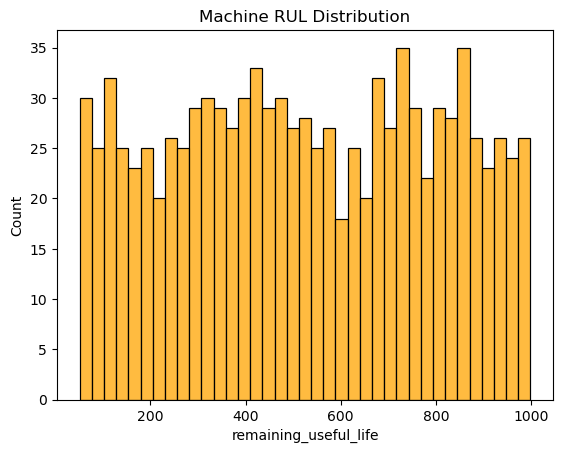

In [15]:
# Target variable distribution
sns.histplot(df["remaining_useful_life"], bins=37, color="orange")
# Title
plt.title('Machine RUL Distribution');

The data distribution for the target variable was randomly created. We can see that the data is not skewed and follows a distribution close to the uniform distribution.

## Summary Statistics

In [16]:
# Data description
df.describe().T.round(2)

count     mean      std    min      25%      50%  \
vibration              1000.0     2.58     1.37   0.11     1.40     2.59   
temperature            1000.0    70.21    17.54  40.04    55.04    70.49   
pressure               1000.0   175.31    70.83  50.03   113.37   174.46   
operating_hours        1000.0  2528.65  1407.72  15.00  1325.25  2516.00   
remaining_useful_life  1000.0   524.87   272.24  51.00   295.00   519.00   

                           75%      max  
vibration                 3.70     5.00  
temperature              85.13    99.92  
pressure                235.27   299.24  
operating_hours        3689.25  4999.00  
remaining_useful_life   756.00   999.00

We can observe that all the numerical data respect the given description. This is expected and means there is no need to clean that numerical data

However, let's visualize the distribution of numerical variables better to get more information.

## Numerical Data Distribution

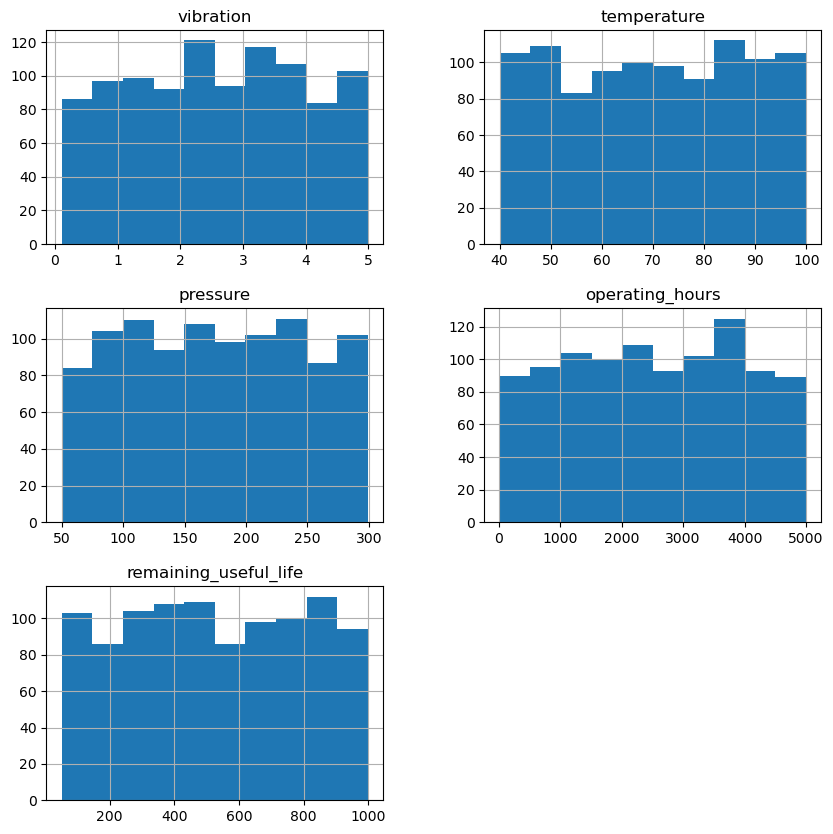

In [17]:
## Histograms of numerical variables
df.hist(figsize = (10, 10));

All the variables follow a quite uniform distribution.

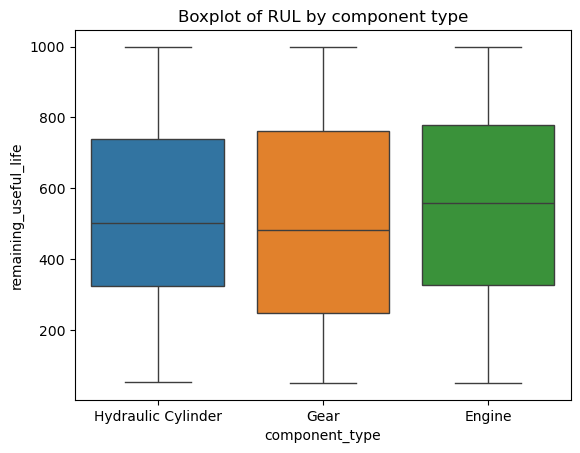

In [18]:
# Boxplot of Income by disease 
sns.boxplot(data = df,
            x = "component_type", y = "remaining_useful_life",
            hue = "component_type")
# Add title
plt.title("Boxplot of RUL by component type");

In our dataset, there is no clear pattern between the target and the type of component. This can be explained by the fact that the target (`remaining_useful_life`) was generated tottally inoependently from the features.

In [19]:
# list of numerical feature variables
numerical = df.drop(columns = "remaining_useful_life").select_dtypes("number").columns.to_list()
numerical

['vibration', 'temperature', 'pressure', 'operating_hours']

## Multicollinearity check

For good practice, let's take a look at numerical columns to check for multicollinearity.

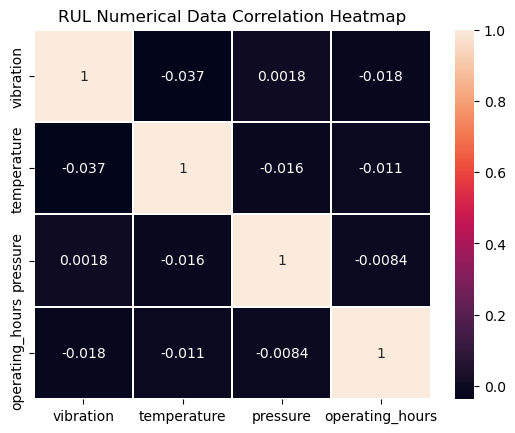

In [20]:
# Correlation Heatmap
plt.title("RUL Numerical Data Correlation Heatmap")
sns.heatmap(df[numerical].corr(), annot = True, linewidths = .1);

The correlation between numerical features is quite low. Even though, this indicate that we don't have to worry about multicollinearity, let's visualize a pairplot of the data.

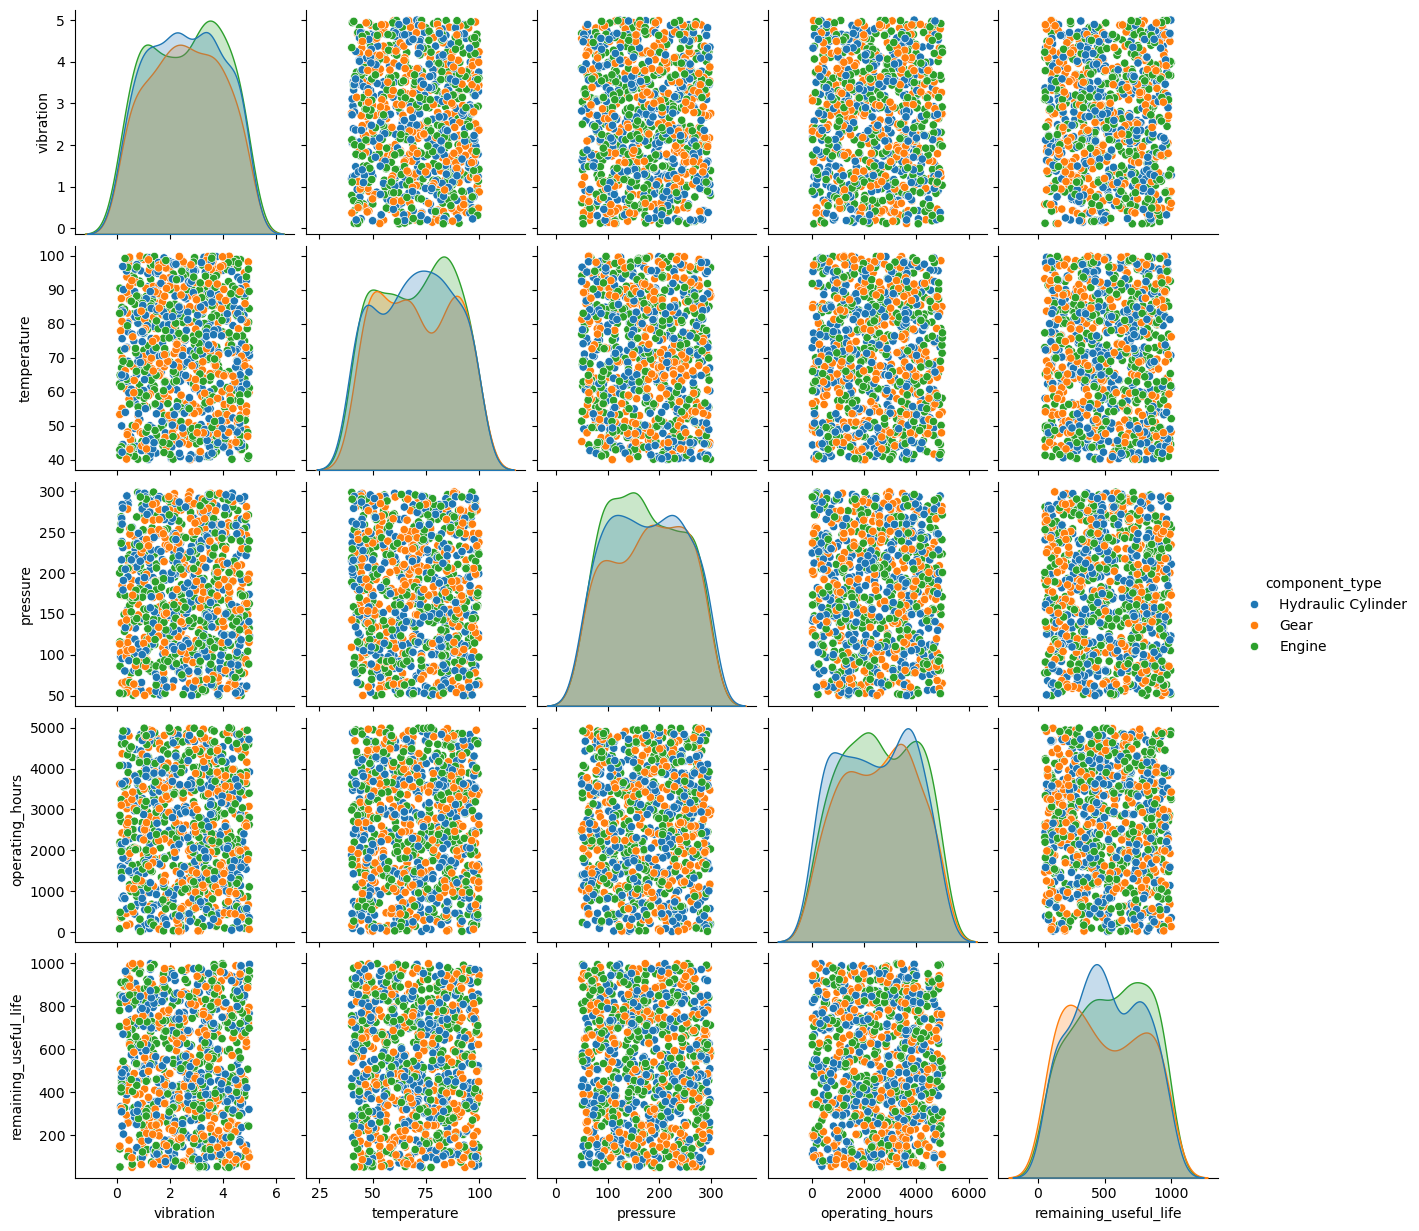

In [21]:
# Pairplot for numerical variables by depression
sns.pairplot(df, hue = "component_type");

The pairplot doesn't show problematic relationships between numerical features.

## Categorical Features values

In [22]:
# list of categorical feature variables
categorical = df.select_dtypes("object").columns.to_list()
categorical

['component_type']

Let's now visualize the number of distinct values and these values for each variable. This can help to decide to drop low cardinality variables (with only one value) and high cardinality variables (with too much values) in our dataset.

In [23]:
# For each categorical variable
for cat in categorical:
    # Print the variable and its values
    print(f"- {cat}: {df[cat].nunique()} values --> {df[cat].unique()} \n")

- component_type: 3 values --> ['Hydraulic Cylinder' 'Gear' 'Engine'] 



The data is clean with the same values as the ones provided by the Features description section.

What we can do now is normalize all those strings with lower-case normalisation, by removing quotes and replacing spaces.

In [24]:
# For each categorical variable
for cat in categorical:
    # Format string values
    df[cat] = df[cat].str.lower().str.replace(" ", "_")
    # Print the variable and its values
    print(f"- {cat}: {df[cat].nunique()} values --> {df[cat].unique()}")

- component_type: 3 values --> ['hydraulic_cylinder' 'gear' 'engine']


All string values of our categorical variable have now been uniformized.

## Data Splitting into Train - Validation - Test

We will split the data into Train/validation/test sets with 60%/20%/20% distribution using Scikit-Learn (`train_test_split` function) with a seed of `42`:

In [25]:
# Splitting into full train and test
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

# Splitting into train and test
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [26]:
# Check datasets sizes after splitting
len(df_train), len(df_val), len(df_test)

(600, 200, 200)

In [27]:
# Reset indexes
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

Let's extract the target variable `y` from our dataframes:

In [28]:
# Get the target values
y_train = df_train.remaining_useful_life.values
y_test = df_test.remaining_useful_life.values
y_val = df_val.remaining_useful_life.values

## Feature Importance Analysis

To evaluate feature importance, we can use the **mutual information score** for categorical variables, and the **pearson correlation** for numerical ones.

### Mutual Information

We calculate the mutual information scores (rounded to 2 decimals) between `y` and other categorical variables in the dataset, using the full train data set. We will define a function to ease the process.

In [29]:
# Function to get mutual information sore with respect to the churn
def mutual_info_y_score(series):
    """
    This function takes a series and returns the mutual information score
    with respect to the `y` variable of the full train data set.
    """
    return round(mutual_info_score(series, df_full_train.remaining_useful_life), 2)

Now, we can apply this function to the categorical variables:

In [30]:
# Apply mutual information columnwise to categorical variables
mi_scores = df_full_train[categorical].apply(mutual_info_y_score)

# Sort scores in ascending order
mi_scores.sort_values(ascending = False)

component_type    0.79
dtype: float64

The analysis of the mutual information scores between our categorical features and the target variable revealed surprisingly low values 📊. This suggests a strong relationship between the categorical variable and the target 🎲.


### Pearson Correlation

We calculate the mutual information scores (rounded to 2 decimals) between `y` and numerical variables in the dataset, using the full train data set:

In [31]:
# Absolute correlations between numerical columns and target
df_full_train[numerical].corrwith(df_full_train.remaining_useful_life).abs().sort_values(ascending = False)

vibration          0.046151
pressure           0.031219
temperature        0.026777
operating_hours    0.018528
dtype: float64

The most important numerical variabe is `vibration`. However the observation is not surprising: numerical features have a very weak predictive power in this dataset.

Note that unlike real-world data 🌍, synthetic datasets are artificially generated using algorithms. These algorithms often fail to replicate the complex, non-linear dependencies seen in real-world phenomena, making it difficult for machine learning models to learn meaningful patterns.

### **Understanding the Impact of Synthetic Data on Model Performance** 🤖📉  

Models trained on synthetic data are inherently limited by the quality of the dataset. If the synthetic data fails to capture meaningful or realistic relationships, the models will struggle to generalize or make accurate predictions 🚫. This explains why, in this case, the data showonly a weak predictive ower etween features and target variables.

**Reminder** 📢✨  

This project is for **educational and experimental purposes only** 🎓🧪. It is part of my journey to complete the **Machine Learning Operations Zoomcamp** certification 🏅.  

---

**More Sources about Synthetic Data** 📚✨  
- 🤖 **Synthetic Data Generation: What Is It and How Can It Be Used?** - [AI Multiple](https://research.aimultiple.com/synthetic-data/?utm_source=chatgpt.com)   
- 🔍 **The Role of Mutual Information in Machine Learning** - [KDnuggets](https://www.kdnuggets.com/2020/09/mutual-information-feature-selection.html?utm_source=chatgpt.com)  

---

## One-hot Encoding

While training Machine Learning models, as they only understand numbers, we will need to encode all categorical variables in our datasets with `One-Hot-Encoding`. For this purpose, we will use `Scikit-Learn` vectorizer: `DictVectorizer`.

NB: Note that the current encoding is only for demonstration purpose as our encoder will be packed together with the model while tracking expreriments.

In [32]:
# Convert training set to list of dictionaries
train_dicts = df_train[numerical + categorical].to_dict(orient = 'records')
# Convert validation set to list of dictionaries
val_dicts = df_val[numerical + categorical].to_dict(orient = 'records')
# Convert test set to list of dictionaries
test_dicts = df_test[numerical + categorical].to_dict(orient = 'records')

# Initialize One-Hot-Encoder (vectorizer)
One_Hot_encoder = DictVectorizer(sparse = True) # sparse when there are many categorical variables ---> most of them are 0s
# One-Hot-Encoder training and train data encoding
X_train = One_Hot_encoder.fit_transform(train_dicts)

In [33]:
# Check the features
One_Hot_encoder.get_feature_names_out()

array(['component_type=engine', 'component_type=gear',
       'component_type=hydraulic_cylinder', 'operating_hours', 'pressure',
       'temperature', 'vibration'], dtype=object)

# Experiment tracking and Model Saving to the registry

Our goal is to determine the remaining useful life of a component of a machine, using operations and IoT data in order to know. This problem is a regression problem with machine information as features and remaining useful life as outcome.


## Experiment tracking

We will train a random forest regressor while tracking the experiement with MLFlow. The root mean squared error will be calculated on the validation dataset.

Note that we are currently running mlflow:
```sh
mlflow server \
    --backend-store-uri sqlite:///mlflow.db \
    --default-artifact-root ./mlflow-models
```

In [34]:
# Local tracking URI
MLFLOW_TRACKING_URI = 'http://127.0.0.1:5000'
# Set the tracking URI as local server
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [35]:
# Set a Machine Learning experiment
mlflow.set_experiment("rul-machine-component")

2025/08/04 16:49:24 INFO mlflow.tracking.fluent: Experiment with name 'rul-machine-component' does not exist. Creating a new experiment.


<Experiment: artifact_location='/Users/cm-mboulou-mac/Dvt/Machine-RUL-Predictor/mlflow-models/1', creation_time=1754322564507, experiment_id='1', last_update_time=1754322564507, lifecycle_stage='active', name='rul-machine-component', tags={}>

In [36]:
# Start an experiment run
with mlflow.start_run():
    # Set of model parameters
    params = dict(max_depth = 20, n_estimators = 100, min_samples_leaf = 10,
                  random_state = 0)
    # Log the model parameters
    mlflow.log_params(params)

    # Build a model pipeline
    pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestRegressor(**params, n_jobs = -1)
    )

    # Model training
    pipeline.fit(train_dicts, y_train)
    # Prediction on validation data
    y_pred = pipeline.predict(val_dicts)

    # RMSE score
    rmse = round(root_mean_squared_error(y_pred, y_val), 3)
    # Print parameters and rmse score
    print(params, rmse)
    # Log the model rmse
    mlflow.log_metric('rmse', rmse)

    # Log the model
    mlflow.sklearn.log_model(pipeline, artifact_path = "model")
    # Inform that the model is saved
    print("model saved to the MLFlow registry")


{'max_depth': 20, 'n_estimators': 100, 'min_samples_leaf': 10, 'random_state': 0} 259.735


2025/08/04 16:49:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


model saved to the MLFlow registry
🏃 View run clumsy-worm-887 at: http://127.0.0.1:5000/#/experiments/1/runs/80b7e6bc37034b07977e45ba517cc891
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


# Model Registry

We will now register the model that was previously trained.

In [37]:
# Set an MLFlow client
client = MlflowClient(tracking_uri = MLFLOW_TRACKING_URI)
# Get the RUN ID of the highest rmse
RUN_ID = client.search_runs(
    experiment_ids = '1',
    max_results = 1,
    order_by = ["metrics.rmse ASC"]
)[0].info.run_id
# Show run ID
print(f"The run ID we will use is the following: {RUN_ID}")


The run ID we will use is the following: 80b7e6bc37034b07977e45ba517cc891


In [38]:
# Model name
model_name = 'machine-rul-predictor'
# Register the model
mlflow.register_model(
    model_uri = f"runs:/{RUN_ID}/models", 
    name = model_name
)

# Model version
model_version = 1 # The version increases each time we registered the same model and should be adjusted accordingly
# Model alias
alias = "production" # models can for example go from `challenger` (new) to `champion` (in production)

# Assign alias to the model
client.set_registered_model_alias(
    name = model_name,
    alias = alias,
    version = model_version
)

Successfully registered model 'machine-rul-predictor'.
2025/08/04 16:50:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: machine-rul-predictor, version 1
Created version '1' of model 'machine-rul-predictor'.


# Testing the Model with MLFlow

In [39]:
# Update model URI
logged_model = f'mlflow-models/1/{RUN_ID}/artifacts/model'

# Load the model as a python function using its URI
model = mlflow.pyfunc.load_model(logged_model)
# Make a prediction
y_pred = model.predict(val_dicts)
# Model score
print(round(root_mean_squared_error(y_val, y_pred), 3))

259.735


We obtain the same result as earlier showing that the model was properly saved. Note that saving the model locally helps to retrieve the model even when there is an issue with running MLFlow.

# Model Monitoring With Evidently

We will prepare the data for model monitoring. We will use the validation data as reference data and the test data as current to build our report with Evidently:

In [40]:
# Set the data definition for column mapping
data_definition = DataDefinition(numerical_columns = numerical + ["remaining_useful_life"], categorical_columns = categorical)
# Prepare the data for reporting
val_dataset = Dataset.from_pandas(
    df_val,
    data_definition
) # val
test_dataset = Dataset.from_pandas(
    df_test,
    data_definition
) # test

In [41]:
# Create a report
report = Report(metrics = [
    ValueDrift(column ='remaining_useful_life'),
    DriftedColumnsCount(),
    MissingValueCount(column = 'remaining_useful_life'),
]
)

In [42]:
# Run the report
snapshot = report.run(reference_data = val_dataset,
                      current_data = test_dataset)
# Provide a snapshot
snapshot

In [43]:
# Save the report as dictionary
result = snapshot.dict()
# Output the report dictionary
result

{'metrics': [{'id': '1ed0a3101a3ff39c3643e1515122be4d',
   'metric_id': 'ValueDrift(column=remaining_useful_life)',
   'value': np.float64(0.7933622419382523)},
  {'id': '15e89f895b482f9b84ba7274ed18a106',
   'metric_id': 'DriftedColumnsCount(drift_share=0.5)',
   'value': {'count': 1.0, 'share': 0.16666666666666666}},
  {'id': '16e6760b57c88b852dfba9166c2ddcc1',
   'metric_id': 'MissingValueCount(column=remaining_useful_life)',
   'value': {'count': 0.0, 'share': np.float64(0.0)}}],
 'tests': []}

In [44]:
# Send an alert if there is a value drift
if result['metrics'][0]['value'] > 0.5:
    print("There is a prediction drift. Need some adjustment!!!")
else:
    print("all good...")

There is a prediction drift. Need some adjustment!!!


---